In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [7]:
x_Train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

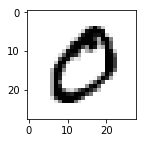

In [8]:
plot_image(x_Train[1])

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

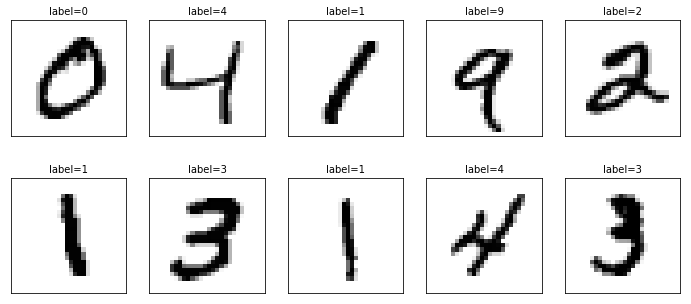

In [10]:
plot_images_labels_prediction(x_Train,y_Train,[],1,10)

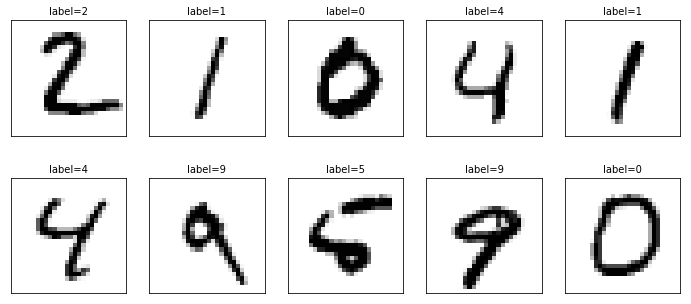

In [11]:
plot_images_labels_prediction(x_Test,y_Test,[],1,10)

In [12]:
x_Train.shape

(60000, 28, 28)

In [13]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [14]:
x_Train4D.shape

(60000, 28, 28, 1)

In [15]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
del (x_Train4D, x_Test4D)

In [16]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [17]:
y_Train[:2]

array([5, 0], dtype=uint8)

In [18]:
y_TrainOneHot[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### build CNN model

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [20]:
model = Sequential()

In [21]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(6,6),
                 strides=(1, 1), #strides=(2, 2) would be worse
                 padding='same',#padding'same' tries to pad evenly left and right
                 input_shape=(28,28,1), 
                 activation='relu'))

In [22]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
model.add(Conv2D(filters=36,
                 kernel_size=(6,6),
                 padding='same',
                 activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.20))

In [26]:
# 平坦化
model.add(Flatten())

In [27]:
model.add(Dense(128, activation='relu'))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        20772     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

### Start training

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [32]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=12, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
 - 51s - loss: 0.4839 - acc: 0.8490 - val_loss: 0.0935 - val_acc: 0.9711
Epoch 2/12
 - 49s - loss: 0.1306 - acc: 0.9620 - val_loss: 0.0676 - val_acc: 0.9794
Epoch 3/12
 - 49s - loss: 0.0932 - acc: 0.9727 - val_loss: 0.0558 - val_acc: 0.9828
Epoch 4/12
 - 49s - loss: 0.0744 - acc: 0.9776 - val_loss: 0.0442 - val_acc: 0.9874
Epoch 5/12
 - 48s - loss: 0.0640 - acc: 0.9811 - val_loss: 0.0395 - val_acc: 0.9878
Epoch 6/12
 - 49s - loss: 0.0583 - acc: 0.9825 - val_loss: 0.0381 - val_acc: 0.9891
Epoch 7/12
 - 48s - loss: 0.0489 - acc: 0.9850 - val_loss: 0.0363 - val_acc: 0.9889
Epoch 8/12
 - 49s - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0335 - val_acc: 0.9903
Epoch 9/12
 - 48s - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0337 - val_acc: 0.9909
Epoch 10/12
 - 48s - loss: 0.0356 - acc: 0.9891 - val_loss: 0.0332 - val_acc: 0.9904
Epoch 11/12
 - 48s - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0327 - val_acc: 0.9904
Epoch 12/12
 - 48s - los

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

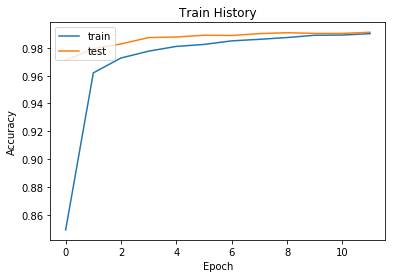

In [34]:
show_train_history('acc','val_acc')

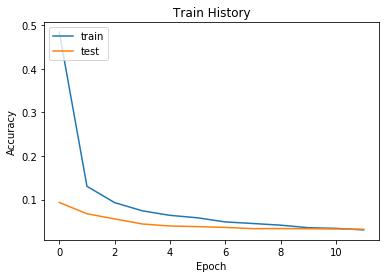

In [36]:
show_train_history('loss','val_loss')

### Evaluate accuracy

In [35]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 373us/step


0.9934

### Pridict

In [37]:
prediction=model.predict_classes(x_Test4D_normalize)

In [38]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

### Plot result

In [39]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

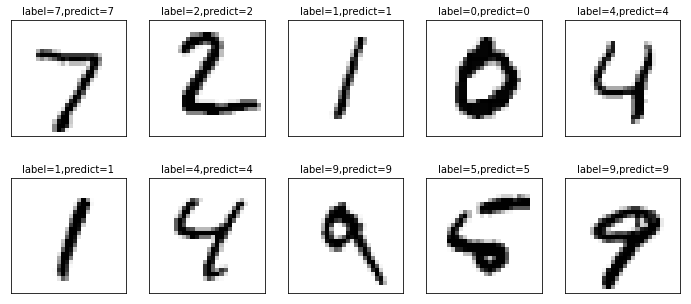

In [40]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

### Show confusion matrix

In [41]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,3,0,1028,0,0,0,0,1,0,0
3,0,0,2,1002,0,2,0,3,1,0
4,0,0,0,0,977,0,0,0,2,3
5,2,0,0,4,0,884,2,0,0,0
6,4,2,0,0,1,0,950,0,1,0
7,0,1,3,0,0,0,0,1023,1,0
8,2,0,2,2,0,1,0,2,962,3


In [42]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [43]:
df[(df.label==9)&(df.predict==7)]

,label,predict
4224,9,7
6571,9,7
9642,9,7
9692,9,7


In [44]:
df[(df.label==9)&(df.predict==7)].index

Int64Index([4224, 6571, 9642, 9692], dtype='int64')

### Show wrong predictions

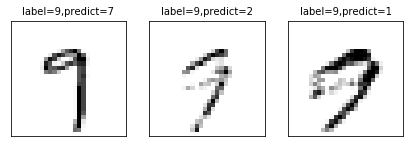

In [45]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==9)&(df.predict==7)].index],[y_Test[i] for i in df[(df.label==9)&(df.predict==7)].index],prediction,idx=0, num=3)